# Test Neurolearn Functionality

In [26]:
from pyneurovault import api
import os
import pandas as pd
import matplotlib.pyplot as plt
import time
import nibabel as nb
import numpy as np
# import sklearn
from nltools.analysis import Predict, apply_mask
%matplotlib inline

outfolder = "/Users/lukechang/Downloads/nv_tmp"


# Download Pain Images

In [2]:
tic = time.time() #Start Timer

# Pain Collection
collection = 504

# Will extract all collections and images in one query to work from
nv = api.NeuroVault()

# Download all images to file
standard = os.path.join(os.path.dirname(api.__file__),'data','MNI152_T1_2mm_brain.nii.gz')
nv.download_images(dest_dir = outfolder,target=standard, collection_ids=[collection],resample=False)

print 'Elapsed: %.2f seconds' % (time.time() - tic) #Stop timer

Extracting NeuroVault collections meta data...
Found 233 results.
Extracting NeuroVault images meta data...
Found 6299 results.
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=1000
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=2000
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=3000
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=4000
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=5000
Retrieving http://neurovault.org/api/images/?format=json&limit=1000&offset=6000
NeuroVault Object (nv) Includes <nv.images><nv.collections>
Elapsed: 112.70 seconds


# Run Prediction

overall Root Mean Squared Error: 0.98
overall Correlation: 0.55
Elapsed: 5.33 seconds


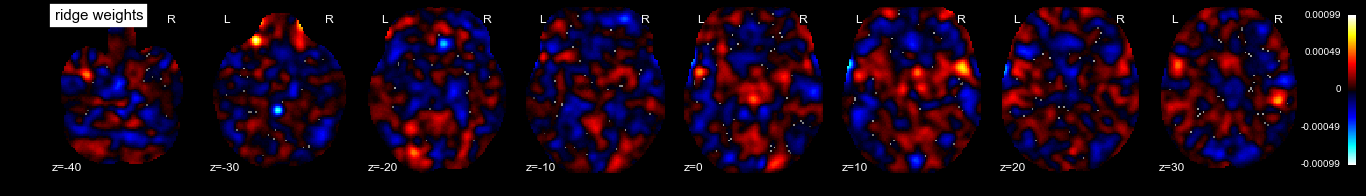

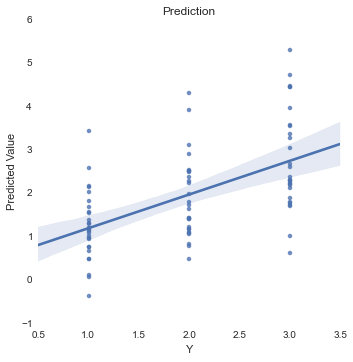

In [33]:
tic = time.time() #Start Timer

# Create Variables
collection_data = nv.get_images_df().ix[nv.get_images_df().collection_id == collection,:].reset_index()
img_index = sorted((e,i) for i,e in enumerate(collection_data.file))
index = [x[1] for x in img_index]
img_file = [x[0] for x in img_index]
dat = nb.funcs.concat_images([os.path.join(outfolder,'original',str(x) + '.nii.gz') for x in collection_data.image_id[index]])

holdout = [int(x.split('_')[-2]) for x in img_file]

heat_level = [x.split('_')[-1].split('.')[0] for x in img_file]
Y_dict = {'High':3,'Medium':2,'Low':1}
Y = np.array([Y_dict[x] for x in heat_level])

## Test Prediction with kfold xVal
# SVR
# negvneu = Predict(dat,Y,algorithm='svr',subject_id = holdout, output_dir=outfolder, cv_dict = {'kfolds':5}, **{'kernel':"linear"})
# negvneu = Predict(dat,Y,algorithm='svr',subject_id = holdout, output_dir=outfolder, cv_dict = {'loso':holdout}, **{'kernel':"linear"})
# negvneu.predict()
# print 'Elapsed: %.2f seconds' % (time.time() - tic) #Stop timer

# Ridge
negvneu = Predict(dat,Y,algorithm='ridge',subject_id = holdout, output_dir=outfolder, cv_dict = {'kfolds':5})
negvneu.predict()

print 'Elapsed: %.2f seconds' % (time.time() - tic) #Stop timer
